         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 106
         Gradient evaluations: 94


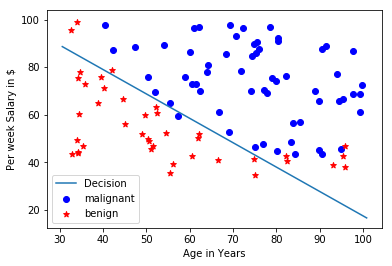

Probability Obtain: 0.998205
Obtain training accuracy: 90.0


In [161]:
import numpy as np 
import matplotlib.pyplot as plt
 

def sigmoid_function(X):
   return 1/(1+np.exp(-X))

def cost_function(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first_half = np.multiply(-y, np.log(sigmoid_function(X * theta.T)))
    second_half = np.multiply((1 - y), np.log(1 - sigmoid_function(X * theta.T)))
    return np.sum(first_half - second_half) / (len(X))

def gradient_descent(theta,X,y):
   theta.shape = (1, 3)
   gradi = zeros(3)
   hypo = sigmoid_function(X.dot(theta.conj().transpose()))
   delta = hypo - y
   length = gradi.size
   for i in range(length):
      sumdelta = delta.conj().transpose().dot(X[:, i])
      gradi[i] = (1.0 / m) * sumdelta * (-1)
   theta.shape = (3,)
   return gradi

data = loadtxt('data.txt', delimiter=',')
X = data[:, 0:2]
y =  data[:, 2]
positive = where(y == 1)
negative = where(y == 0)
scatter(X[positive, 0], X[positive, 1], marker='o', c='b')
scatter(X[negative, 0], X[negative, 1], marker='*', c='r')
xlabel('Age in Years')
ylabel('Per week Salary in $')
legend(['X', 'Y'])

m, n = X.shape
y.shape = (m, 1)
i = ones(shape=(m, 3))
i[:, 1:3] = X

def set_thetas(i, y):
    def f(theta):
        return cost_function(theta, i, y)

    def f_dash(theta):
        return gradient_descent(theta, i, y)
    theta = zeros(3)
    return fmin_bfgs(f, theta, f_dash, disp=True, maxiter=400)

set_thetas(i, y)
theta_value = [-24.161272, 0.206233, 0.201470]

plot_x = array([min(i[:, 1]) - 2, max(i[:, 2]) + 2])
plot_y = (-1/theta_value[2]) * (theta[1] * plot_x + theta[0])

plot(plot_x, plot_y)
legend(['Decision', 'malignant', 'benign'])
show()

probablitiy = sigmoid_function(array([1.0, 55.0, 95.0]).dot(array(theta).conj().transpose()))
print ('Probability Obtain: %f' % probablitiy)

def prediction(theta,X):
   m, n = X.shape
   A = zeros(shape=(m, 1))
   hypo = sigmoid_function(X.dot(theta.conj().transpose()))

   for i in range(0, hypo.shape[0]):
        if hypo[i] < 0.5:
            A[i, 0] = 0
        else:
            A[i, 0] = 1
   return A

A = prediction(array(theta), i)
print ("Obtain training accuracy:",((y[where(A == y)].size / float(y.size)) * 100.0))
